In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 

df = pd.read_csv(r'C:\Users\USER\Documents\Dsi team project\Pharma.csv')


# Multiple linear regression

Hypothesis:    Can we predict total pharmaceutical spending based on health spending percentage and GDP percentage?

In [8]:

import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['PC_HEALTHXP', 'PC_GDP']]  # Independent variable
y = df['TOTAL_SPEND']               # Dependent variable

# intercept
X = sm.add_constant(X)


In [9]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = sm.OLS(y_train, X_train).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           9.72e-51
Time:                        17:37:55   Log-Likelihood:                -9769.5
No. Observations:                 828   AIC:                         1.955e+04
Df Residuals:                     825   BIC:                         1.956e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4025.7314   3263.398     -1.234      

Although the p values suggest this model is significant, 0 does not seem right. 
The R sq is also pretty low.
Requires further investigation


see excluding missing data, ts forecasting, how can we rank them?
sseperate countries based on gdp, then use the highest ones with the most data to forexast? divide the countries by developed, developing etc


# Part 2

In [11]:
# Get the unique countries based on the LOCATION column
unique_countries = df['LOCATION'].unique()

# Print the list of unique countries
print("Countries in the dataset:")
for country in unique_countries:
    print(country)

# Count the number of unique countries (locations) in the 'LOCATION' column
unique_locations_count = df['LOCATION'].nunique()



Countries in the dataset:
AUS
AUT
BEL
CAN
CHE
CZE
DEU
DNK
ESP
EST
FIN
FRA
GBR
GRC
HUN
IRL
ISL
ISR
ITA
JPN
KOR
LTU
LUX
LVA
MEX
NLD
NOR
NZL
POL
PRT
RUS
SVK
SVN
SWE
TUR
USA


# Sort top 10 and bottom 10 by PPP

In [ ]:

# Sort the DataFrame by 'USD_CAP' in descending order to get top 10 countries
df_sorted = df.sort_values(by='USD_CAP', ascending=False)

# Get top 10 countries based on 'USD_CAP'
top_10_countries = df_sorted.head(10)

# Get bottom 10 countries based on 'USD_CAP'
bottom_10_countries = df_sorted.tail(10)

# Display the results (optional)
print("Top 10 countries by Pharmaceutical Spending per Capita (USD_CAP):")
print(top_10_countries[['LOCATION', 'USD_CAP']])

print("\nBottom 10 countries by Pharmaceutical Spending per Capita (USD_CAP):")
print(bottom_10_countries[['LOCATION', 'USD_CAP']])




Top 10 countries by Pharmaceutical Spending per Capita (USD_CAP):
     LOCATION   USD_CAP
1035      USA  1162.399
1034      USA  1081.402
186       CHE  1056.053
185       CHE   985.969
1033      USA   980.864
1031      USA   965.580
1032      USA   964.237
184       CHE   956.715
1029      USA   946.894
1030      USA   946.859

Bottom 10 countries by Pharmaceutical Spending per Capita (USD_CAP):
    LOCATION  USD_CAP
663      KOR   10.113
662      KOR    7.803
661      KOR    7.199
892      PRT    6.784
660      KOR    5.949
655      KOR    3.336
659      KOR    3.331
658      KOR    3.289
657      KOR    3.237
656      KOR    3.160


In [ ]:


# Remove duplicates to ensure each country is represented only once
df_unique = df.drop_duplicates(subset=['LOCATION'])

# Sort the DataFrame by 'USD_CAP' (GDP per capita)
df_sorted_usd_cap = df_unique.sort_values(by='USD_CAP', ascending=False)

# Get the top 10 countries by GDP per capita
top_10_usd_cap = df_sorted_usd_cap.head(10)

# Get the bottom 10 countries by GDP per capita
bottom_10_usd_cap = df_sorted_usd_cap.tail(10)

# Display the results (optional)
print("Top 10 countries by USD_CAP:")
print(top_10_usd_cap[['LOCATION', 'USD_CAP']])

print("\nBottom 10 countries by USD_CAP:")
print(bottom_10_usd_cap[['LOCATION', 'USD_CAP']])


Top 10 countries by USD_CAP:
     LOCATION  USD_CAP
1020      USA  518.109
949       SVN  358.670
931       RUS  309.900
714       LUX  267.785
594       ITA  251.631
702       LTU  243.511
586       ISR  236.833
878       POL  211.341
932       SVK  206.344
735       LVA  180.294

Bottom 10 countries by USD_CAP:
     LOCATION  USD_CAP
764       NLD   33.085
540       ISL   30.757
854       NZL   24.598
343       FIN   23.396
419       GBR   22.406
963       SWE   20.418
1009      TUR   12.664
807       NOR   11.514
892       PRT    6.784
655       KOR    3.336


This is including countries that are not normally considered developed 

Separating the countries in top 10 and bottom 10 based on GDP as a measure of developmental status.

In [ ]:
# Sort the DataFrame by the GDP column in descending order (from highest to lowest)
df_sorted_gdp = df.sort_values(by='GDP', ascending=False)

# Get the top 10 countries by GDP
top_10_gdp = df_sorted_gdp.head(10)

# Get the bottom 10 countries by GDP
bottom_10_gdp = df_sorted_gdp.tail(10)

# Display the results (optional)
print("Top 10 countries by GDP:")
print(top_10_gdp[['LOCATION', 'GDP']])

print("\nBottom 10 countries by GDP:")
print(bottom_10_gdp[['LOCATION', 'GDP']])

KeyError: 'GDP'

# Filtering Time (2004-2015)

In [15]:
# Filter the data to only include years 2004-2015
df_filtered_years = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# Display the filtered dataset (optional)
print("Filtered dataset with years 2004-2015:")
print(df_filtered_years[['LOCATION', 'TIME', 'USD_CAP']])


Filtered dataset with years 2004-2015:
     LOCATION  TIME   USD_CAP
33        AUS  2004   429.882
34        AUS  2005   432.513
35        AUS  2006   461.821
36        AUS  2007   485.887
37        AUS  2008   510.172
...       ...   ...       ...
1031      USA  2011   965.580
1032      USA  2012   964.237
1033      USA  2013   980.864
1034      USA  2014  1081.402
1035      USA  2015  1162.399

[383 rows x 3 columns]


In [16]:


# Filter the data to only include years 2004-2015
df_filtered_years = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# Sort the DataFrame by 'USD_CAP' (GDP per capita) in descending order
df_sorted_usd_cap = df_filtered_years.sort_values(by='USD_CAP', ascending=False)

# Get the top 10 countries by USD_CAP (GDP per capita)
top_10_usd_cap = df_sorted_usd_cap.head(10)

# Get the bottom 10 countries by USD_CAP (GDP per capita)
bottom_10_usd_cap = df_sorted_usd_cap.tail(10)

# Display the results (optional)
print("Top 10 countries by USD_CAP (2004-2015):")
print(top_10_usd_cap[['LOCATION', 'TIME', 'USD_CAP']])

print("\nBottom 10 countries by USD_CAP (2004-2015):")
print(bottom_10_usd_cap[['LOCATION', 'TIME', 'USD_CAP']])



Top 10 countries by USD_CAP (2004-2015):
     LOCATION  TIME   USD_CAP
1035      USA  2015  1162.399
1034      USA  2014  1081.402
186       CHE  2015  1056.053
185       CHE  2014   985.969
1033      USA  2013   980.864
1031      USA  2011   965.580
1032      USA  2012   964.237
184       CHE  2013   956.715
1029      USA  2009   946.894
1030      USA  2010   946.859

Bottom 10 countries by USD_CAP (2004-2015):
    LOCATION  TIME  USD_CAP
586      ISR  2006  236.833
739      LVA  2008  234.848
875      NZL  2005  227.251
333      EST  2006  225.173
874      NZL  2004  213.402
737      LVA  2006  209.574
332      EST  2005  196.655
331      EST  2004  187.682
736      LVA  2005  182.984
735      LVA  2004  180.294


Remove RUS,ISR,TUR,NZL and GBR due to missing values

In [17]:
# Filter the data to only include years 2004-2015
df_filtered_years = df[(df['TIME'] >= 2004) & (df['TIME'] <= 2015)]

# List of countries to exclude
countries_to_exclude = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']

# Filter out the countries by location (remove rows with specified countries)
df_filtered_excluded = df_filtered_years[~df_filtered_years['LOCATION'].isin(countries_to_exclude)]

# Display the filtered dataset (optional)
print("Filtered dataset (2004-2015) without RUS, TUR, GBR, NZL, ISR:")
print(df_filtered_excluded[['LOCATION', 'TIME', 'USD_CAP']])


Filtered dataset (2004-2015) without RUS, TUR, GBR, NZL, ISR:
     LOCATION  TIME   USD_CAP
33        AUS  2004   429.882
34        AUS  2005   432.513
35        AUS  2006   461.821
36        AUS  2007   485.887
37        AUS  2008   510.172
...       ...   ...       ...
1031      USA  2011   965.580
1032      USA  2012   964.237
1033      USA  2013   980.864
1034      USA  2014  1081.402
1035      USA  2015  1162.399

[367 rows x 3 columns]


In [18]:
# Drop duplicates, keeping only the most recent entry for each country
df_unique = df_filtered_excluded.drop_duplicates(subset=['LOCATION'], keep='last')

# Sort the DataFrame by 'USD_CAP' (GDP per capita) in descending order
df_sorted_usd_cap = df_unique.sort_values(by='USD_CAP', ascending=False)

# Get the top 10 countries by USD_CAP (GDP per capita)
top_10_usd_cap = df_sorted_usd_cap.head(10)

# Get the bottom 10 countries by USD_CAP (GDP per capita)
bottom_10_usd_cap = df_sorted_usd_cap.tail(10)

# Display the results (optional)
print("Top 10 countries by USD_CAP (2004-2015):")
print(top_10_usd_cap[['LOCATION', 'TIME', 'USD_CAP']])

print("\nBottom 10 countries by USD_CAP (2004-2015):")
print(bottom_10_usd_cap[['LOCATION', 'TIME', 'USD_CAP']])


Top 10 countries by USD_CAP (2004-2015):
     LOCATION  TIME   USD_CAP
1035      USA  2015  1162.399
186       CHE  2015  1056.053
654       JPN  2014   802.733
155       CAN  2014   785.811
257       DEU  2015   765.970
539       IRL  2015   684.269
110       BEL  2015   678.971
418       FRA  2015   667.551
69        AUT  2015   632.737
43        AUS  2014   616.997

Bottom 10 countries by USD_CAP (2004-2015):
    LOCATION  TIME  USD_CAP
585      ISL  2015  497.840
852      NOR  2015  473.844
212      CZE  2015  421.663
805      NLD  2015  416.594
930      PRT  2015  412.877
746      LVA  2015  383.852
891      POL  2015  357.184
342      EST  2015  343.486
293      DNK  2015  341.823
763      MEX  2015  286.825


After dropping the 5 countries and using 2004-15 data, all the countries in Top 10 are developed countries. In the bottom 10 Iceland (ISL), Norway (NOR), Netherlands (NLD), Portugal (PRT), Denmark (DNK) are developed countries with high standard of living. 

SOrting by % of health spending 

In [19]:
# Drop duplicates, keeping only the most recent entry for each country
df_unique = df_filtered_excluded.drop_duplicates(subset=['LOCATION'], keep='last')

# Sort the DataFrame by 'USD_CAP' (GDP per capita) in descending order
df_sorted_healthxp = df_unique.sort_values(by='PC_HEALTHXP', ascending=False)

# Get the top 10 countries by USD_CAP (GDP per capita)
top_10_usd_cap = df_sorted_healthxp.head(10)

# Get the bottom 10 countries by USD_CAP (GDP per capita)
bottom_10_usd_cap = df_sorted_healthxp.tail(10)

# Display the results (optional)
print("Top 10 countries by % Health Spending (2004-2015):")
print(top_10_usd_cap[['LOCATION', 'TIME', 'PC_HEALTHXP']])

print("\nBottom 10 countries by PC_HEALTHXP (2004-2015):")
print(bottom_10_usd_cap[['LOCATION', 'TIME', 'PC_HEALTHXP']])


Top 10 countries by % Health Spending (2004-2015):
    LOCATION  TIME  PC_HEALTHXP
498      HUN  2015       29.215
763      MEX  2015       27.201
948      SVK  2015       26.866
713      LTU  2015       26.784
746      LVA  2015       26.761
476      GRC  2015       25.878
700      KOR  2015       21.427
891      POL  2015       20.966
654      JPN  2014       18.803
962      SVN  2015       18.330

Bottom 10 countries by PC_HEALTHXP (2004-2015):
     LOCATION  TIME  PC_HEALTHXP
539       IRL  2015       12.970
388       FIN  2015       12.546
69        AUT  2015       12.407
1035      USA  2015       12.227
585       ISL  2015       12.126
1008      SWE  2015        9.851
734       LUX  2015        8.601
805       NLD  2015        7.865
852       NOR  2015        7.655
293       DNK  2015        6.758


# Forecast 2016 using linear regression

In [20]:

from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Filter the dataset for the years 2004-2015
df_filtered_excluded_2004_2015 = df_filtered_excluded[(df_filtered_excluded['TIME'] >= 2004) & 
                                                       (df_filtered_excluded['TIME'] <= 2015)]

# Step 2: Exclude specific countries (RUS, TUR, GBR, NZL, ISR)
excluded_countries = ['RUS', 'TUR', 'GBR', 'NZL', 'ISR']
df_filtered_excluded_2004_2015 = df_filtered_excluded_2004_2015[~df_filtered_excluded_2004_2015['LOCATION'].isin(excluded_countries)]

# Step 3: Prepare the feature (X) and target (y) for the linear regression model
# We will use 'TIME' as the feature and 'TOTAL_SPEND' as the target
df_selected_countries = df_filtered_excluded_2004_2015[['LOCATION', 'TIME', 'TOTAL_SPEND']]
df_selected_countries = df_selected_countries.dropna()  # Remove rows with missing data

# Step 4: Initialize the model
model = LinearRegression()

# Step 5: Forecast TOTAL_SPEND for 2016 for each country
predictions = []

# Iterate through each country in the filtered dataset
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Predict for 2016
    prediction_2016 = model.predict(np.array([[2016]]))
    
    # Store the result
    predictions.append({'LOCATION': country, 'TIME': 2016, 'Predicted_TOTAL_SPEND': prediction_2016[0]})

# Step 6: Create a DataFrame to store the results
forecast_df = pd.DataFrame(predictions)

# Display the results
print(forecast_df)


   LOCATION  TIME  Predicted_TOTAL_SPEND
0       AUS  2016           16070.758455
1       AUT  2016            5533.117576
2       BEL  2016            7919.392879
3       CAN  2016           31248.270909
4       CHE  2016            9303.201818
5       CZE  2016            4760.247121
6       DEU  2016           63776.664394
7       DNK  2016            2057.415152
8       ESP  2016           27625.957273
9       EST  2016             473.419697
10      FIN  2016            2834.110909
11      FRA  2016           46542.060455
12      GRC  2016            7330.716843
13      HUN  2016            6013.757273
14      IRL  2016            3636.062121
15      ISL  2016             170.625152
16      ITA  2016           36000.472727
17      JPN  2016          113903.595636
18      KOR  2016           30777.929394
19      LTU  2016            1520.420909
20      LUX  2016             334.032273
21      LVA  2016             750.843636
22      MEX  2016           37216.731970
23      NLD  201

c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  

compare to actual 2016

In [21]:
#  Extract the actual data for 2016 from the original dataset
df_actual_2016 = df[df['TIME'] == 2016][['LOCATION', 'TOTAL_SPEND']]


# Merge the forecasted values with the actual data for 2016
forecast_comparison_df = pd.merge(forecast_df, df_actual_2016, on='LOCATION', how='left')

# Filter the merged DataFrame to only include rows where actual data for 2016 exists
forecast_comparison_df = forecast_comparison_df.dropna(subset=['TOTAL_SPEND'])

# Calculate the difference between forecasted and actual TOTAL_SPEND
forecast_comparison_df['Difference'] = forecast_comparison_df['Predicted_TOTAL_SPEND'] - forecast_comparison_df['TOTAL_SPEND']

# Calculate the absolute error
forecast_comparison_df['Absolute_Error'] = forecast_comparison_df['Difference'].abs()

# Display the comparison for only countries that have actual data for 2016
print(forecast_comparison_df[['LOCATION', 'Predicted_TOTAL_SPEND', 'TOTAL_SPEND', 'Difference', 'Absolute_Error']])


   LOCATION  Predicted_TOTAL_SPEND  TOTAL_SPEND   Difference  Absolute_Error
16      ITA           36000.472727     36643.66  -643.187273      643.187273
18      KOR           30777.929394     28296.65  2481.279394     2481.279394
23      NLD            7292.208182      7354.27   -62.061818       62.061818
24      NOR            2470.046061      2622.48  -152.433939      152.433939


In [22]:
import statsmodels.api as sm

# Create a list to store results
country_p_values = []

# Iterate over each unique country
for country in df_filtered_excluded['LOCATION'].unique():
    # Filter the dataset for the specific country
    country_data = df_filtered_excluded[df_filtered_excluded['LOCATION'] == country]
    
    # Prepare the independent variables (you can include any predictors you want)
    X = country_data[['PC_HEALTHXP', 'PC_GDP']]  # You can add other features as well
    y = country_data['TOTAL_SPEND']
    
    # Add a constant (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract the p-value for the whole model (you can also get p-values for individual coefficients)
    country_p_values.append({
        'Country': country,
        'P-Value': model.pvalues[1]  # P-value for the 'PC_HEALTHXP' coefficient (or any other coefficient)
    })

# Convert the results to a DataFrame
p_value_df = pd.DataFrame(country_p_values)

# Display the p-values for all countries
print(p_value_df)


C:\Users\USER\AppData\Local\Temp\ipykernel_10628\2488835838.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': model.pvalues[1]  # P-value for the 'PC_HEALTHXP' coefficient (or any other coefficient)
C:\Users\USER\AppData\Local\Temp\ipykernel_10628\2488835838.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': model.pvalues[1]  # P-value for the 'PC_HEALTHXP' coefficient (or any other coefficient)
C:\Users\USER\AppData\Local\Temp\ipykernel_10628\2488835838.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treate

   Country   P-Value
0      AUS  0.000798
1      AUT  0.004161
2      BEL  0.000003
3      CAN  0.022087
4      CHE  0.168273
5      CZE  0.000080
6      DEU  0.004704
7      DNK  0.001737
8      ESP  0.000027
9      EST  0.000328
10     FIN  0.000166
11     FRA  0.001072
12     GRC  0.047047
13     HUN  0.050169
14     IRL  0.004542
15     ISL  0.084618
16     ITA  0.007805
17     JPN  0.087089
18     KOR  0.000001
19     LTU  0.073003
20     LUX  0.742616
21     LVA  0.001931
22     MEX  0.172007
23     NLD  0.035370
24     NOR  0.003701
25     POL  0.007904
26     PRT  0.222250
27     SVK  0.000033
28     SVN  0.000093
29     SWE  0.010314
30     USA  0.015683


C:\Users\USER\AppData\Local\Temp\ipykernel_10628\2488835838.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  'P-Value': model.pvalues[1]  # P-value for the 'PC_HEALTHXP' coefficient (or any other coefficient)


In [23]:
import statsmodels.api as sm


# Create a list to store results
country_p_values = []
non_significant_countries = []

# Iterate over each unique country
for country in df_filtered_excluded['LOCATION'].unique():
    # Filter the dataset for the specific country
    country_data = df_filtered_excluded[df_filtered_excluded['LOCATION'] == country]
    
    # Prepare the independent variables 
    X = country_data[['PC_HEALTHXP', 'PC_GDP']]  
    y = country_data['TOTAL_SPEND']
    
    # Add a constant (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract p-values for the coefficients
    p_value_healthxp = model.pvalues['PC_HEALTHXP']  # P-value for 'PC_HEALTHXP'
    p_value_gdp = model.pvalues['PC_GDP']  # P-value for 'PC_GDP'
    
    
    # Check significance (using 0.05 as the threshold)
    if p_value_healthxp <= 0.05 or p_value_gdp <= 0.05:
        # Significant predictors
        country_p_values.append({
            'Country': country,
            'Significant Predictors': {
                'PC_HEALTHXP': p_value_healthxp if p_value_healthxp <= 0.05 else None,
                'PC_GDP': p_value_gdp if p_value_gdp <= 0.05 else None
            }
        })
    else:
        # Non-significant predictors
        non_significant_countries.append({
            'Country': country,
            'P-Value (HealthXP)': p_value_healthxp,
            'P-Value (GDP)': p_value_gdp
        })

# Convert the results to DataFrames
p_value_df = pd.DataFrame(country_p_values)
non_significant_df = pd.DataFrame(non_significant_countries)

# Display the significant and non-significant results
print("Countries with Significant Predictors:")
print(p_value_df)

print("\nCountries with Non-Significant Predictors:")
print(non_significant_df)


Countries with Significant Predictors:
   Country                             Significant Predictors
0      AUS  {'PC_HEALTHXP': 0.0007982784051586243, 'PC_GDP...
1      AUT  {'PC_HEALTHXP': 0.004161273508038595, 'PC_GDP'...
2      BEL  {'PC_HEALTHXP': 3.0949769183502785e-06, 'PC_GD...
3      CAN  {'PC_HEALTHXP': 0.022086564058764562, 'PC_GDP'...
4      CHE  {'PC_HEALTHXP': None, 'PC_GDP': 0.003954285176...
5      CZE  {'PC_HEALTHXP': 8.024035645520161e-05, 'PC_GDP...
6      DEU  {'PC_HEALTHXP': 0.004703651328344091, 'PC_GDP'...
7      DNK  {'PC_HEALTHXP': 0.0017372640275439032, 'PC_GDP...
8      ESP  {'PC_HEALTHXP': 2.7003954565892644e-05, 'PC_GD...
9      EST  {'PC_HEALTHXP': 0.0003278245451376223, 'PC_GDP...
10     FIN  {'PC_HEALTHXP': 0.00016649567452971814, 'PC_GD...
11     FRA  {'PC_HEALTHXP': 0.0010717477924017194, 'PC_GDP...
12     GRC  {'PC_HEALTHXP': 0.047046667692314546, 'PC_GDP'...
13     IRL  {'PC_HEALTHXP': 0.004541512440103543, 'PC_GDP'...
14     ITA  {'PC_HEALTHXP': 0.0

In [24]:
\
# Create a list to store results
country_p_values = []
non_significant_countries = []

# Iterate over each unique country
for country in df_filtered_excluded['LOCATION'].unique():
    # Filter the dataset for the specific country
    country_data = df_filtered_excluded[df_filtered_excluded['LOCATION'] == country]
    
    \
    X = country_data[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]  
    y = country_data['TOTAL_SPEND']
    
    # Add a constant (intercept) to the independent variables
    X = sm.add_constant(X)
    
    # Fit the linear regression model
    model = sm.OLS(y, X).fit()
    
    # Extract p-values for the coefficients
    p_value_healthxp = model.pvalues['PC_HEALTHXP']  # P-value for 'PC_HEALTHXP'
    p_value_gdp = model.pvalues['PC_GDP']  # P-value for 'PC_GDP'
    p_value_usd_cap = model.pvalues['USD_CAP']  # P-value for 'USD_CAP'
    
    # Check significance (using 0.05 as the threshold)
    if p_value_healthxp <= 0.05 or p_value_gdp <= 0.05 or p_value_usd_cap <= 0.05:
        # Significant predictors
        country_p_values.append({
            'Country': country,
            'Significant Predictors': {
                'PC_HEALTHXP': p_value_healthxp if p_value_healthxp <= 0.05 else None,
                'PC_GDP': p_value_gdp if p_value_gdp <= 0.05 else None,
                'USD_CAP': p_value_usd_cap if p_value_usd_cap <= 0.05 else None
            }
        })
    else:
        # Non-significant predictors
        non_significant_countries.append({
            'Country': country,
            'P-Value (HealthXP)': p_value_healthxp,
            'P-Value (GDP)': p_value_gdp,
            'P-Value (USD_CAP)': p_value_usd_cap
        })

# Convert the results to DataFrames
p_value_df = pd.DataFrame(country_p_values)
non_significant_df = pd.DataFrame(non_significant_countries)

# Display the significant and non-significant results
print("Countries with Significant Predictors:")
print(p_value_df)

print("\nCountries with Non-Significant Predictors:")
print(non_significant_df)


Countries with Significant Predictors:
   Country                             Significant Predictors
0      AUS  {'PC_HEALTHXP': 0.006637564359383007, 'PC_GDP'...
1      AUT  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
2      BEL  {'PC_HEALTHXP': 0.011512914643699353, 'PC_GDP'...
3      CAN  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
4      CHE  {'PC_HEALTHXP': 7.835480755051678e-06, 'PC_GDP...
5      CZE  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
6      DEU  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
7      DNK  {'PC_HEALTHXP': None, 'PC_GDP': 0.032753726016...
8      ESP  {'PC_HEALTHXP': 0.00014737497586507595, 'PC_GD...
9      EST  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
10     FIN  {'PC_HEALTHXP': 0.0041486893484778105, 'PC_GDP...
11     FRA  {'PC_HEALTHXP': 6.059806404268558e-05, 'PC_GDP...
12     GRC  {'PC_HEALTHXP': None, 'PC_GDP': None, 'USD_CAP...
13     HUN  {'PC_HEALTHXP': 0.0005354415214140082, 'PC_GDP...
14     IRL  {'PC_HEALTHXP': 0.0

In [25]:
# Let's check the model summary for one of the countries with non-significant predictors, like 'HUN'
country_data = df_filtered_excluded[df_filtered_excluded['LOCATION'] == 'HUN']
X = country_data[['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']]
y = country_data['TOTAL_SPEND']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            TOTAL_SPEND   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.254e+04
Date:                Wed, 04 Dec 2024   Prob (F-statistic):           3.80e-17
Time:                        17:38:26   Log-Likelihood:                -36.393
No. Observations:                  12   AIC:                             80.79
Df Residuals:                       8   BIC:                             82.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -212.3603     34.282     -6.194      

c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The model seems significant enough so we will proceed to forecast 2017

In [26]:
model = LinearRegression()

# Forecast TOTAL_SPEND for 2017 for each country
predictions = []

# Iterate through each country in the filtered dataset
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Predict for 2017
    prediction_2017 = model.predict(np.array([[2017]]))  # Change year to 2017
    
    # Store the result
    predictions.append({'LOCATION': country, 'TIME': 2017, 'Predicted_TOTAL_SPEND': prediction_2017[0]})

#  Create a DataFrame to store the results
forecast_df_2017 = pd.DataFrame(predictions)

# Display the results
print(forecast_df_2017)

   LOCATION  TIME  Predicted_TOTAL_SPEND
0       AUS  2017           16709.032000
1       AUT  2017            5696.223869
2       BEL  2017            8142.043193
3       CAN  2017           32307.560000
4       CHE  2017            9875.403636
5       CZE  2017            4862.953345
6       DEU  2017           65748.725967
7       DNK  2017            2100.720047
8       ESP  2017           28302.974930
9       EST  2017             491.181830
10      FIN  2017            2894.194895
11      FRA  2017           47575.702063
12      GRC  2017            7391.467490
13      HUN  2017            6171.511084
14      IRL  2017            3765.128730
15      ISL  2017             172.014277
16      ITA  2017           36438.213531
17      JPN  2017          118691.962545
18      KOR  2017           31940.646352
19      LTU  2017            1576.640280
20      LUX  2017             340.952238
21      LVA  2017             778.795350
22      MEX  2017           37997.013298
23      NLD  201

c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  

c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  

   LOCATION  TIME  Predicted_TOTAL_SPEND       Lower_CI       Upper_CI
0       AUS  2017           16709.032000   16195.220207   17222.843793
1       AUT  2017            5696.223869    5505.822205    5886.625534
2       BEL  2017            8142.043193    7889.628311    8394.458076
3       CAN  2017           32307.560000   30715.944575   33899.175425
4       CHE  2017            9875.403636    8993.888894   10756.918378
5       CZE  2017            4862.953345    4476.476674    5249.430016
6       DEU  2017           65748.725967   63077.303607   68420.148328
7       DNK  2017            2100.720047    1945.715105    2255.724988
8       ESP  2017           28302.974930   26735.980240   29869.969620
9       EST  2017             491.181830     480.344826     502.018834
10      FIN  2017            2894.194895    2780.409623    3007.980167
11      FRA  2017           47575.702063   46207.309693   48944.094433
12      GRC  2017            7391.467490    5473.984463    9308.950517
13    

ValueError: num must be an integer with 1 <= num <= 12, not 13

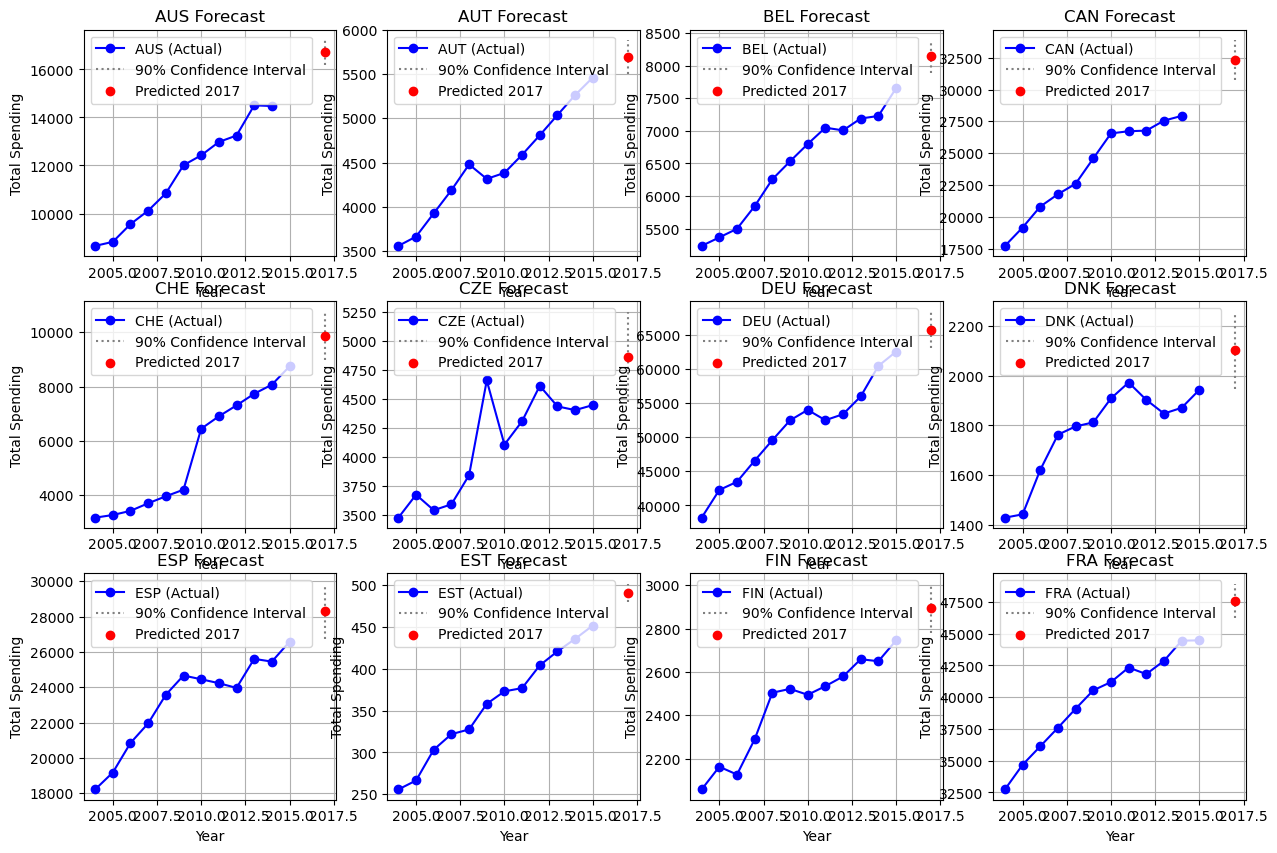

In [30]:


# Forecast TOTAL_SPEND for 2017 for each country
predictions = []

# Initialize a Linear Regression model
model = LinearRegression()

# Iterate through each country in the filtered dataset
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Predict for 2017
    prediction_2017 = model.predict(np.array([[2017]]))  # Change year to 2017
    
    # Calculate the 90% confidence interval using statsmodels OLS
    X_with_const = sm.add_constant(X)  # Add a constant for intercept
    model_sm = sm.OLS(y, X_with_const).fit()  # Fit the OLS model for confidence interval
    pred_ci = model_sm.get_prediction(np.array([[1, 2017]]))  # Get prediction and confidence interval for 2017
    
    # Store the result along with confidence intervals
    lower_ci = pred_ci.conf_int()[0][0]  # Lower bound of the 90% CI
    upper_ci = pred_ci.conf_int()[0][1]  # Upper bound of the 90% CI
    predictions.append({
        'LOCATION': country,
        'TIME': 2017,
        'Predicted_TOTAL_SPEND': prediction_2017[0],
        'Lower_CI': lower_ci,
        'Upper_CI': upper_ci,
    })

# Create a DataFrame to store the results
forecast_df_2017 = pd.DataFrame(predictions)

# Display the forecast results for 2017
print(forecast_df_2017)

# Step 2: Visualize the forecasts with confidence intervals

# Create a figure for the overall plots
plt.figure(figsize=(15, 10))

# Iterate through each country for plotting
for i, country in enumerate(forecast_df_2017['LOCATION']):
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Create a new subplot for each country
    plt.subplot(3, 4, i + 1)  # Create a grid of 3x4 subplots (adjust based on number of countries)
    
    # Plot the actual data points for the country
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], label=f"{country} (Actual)", marker='o', color='blue')
    
    # Get the forecasted value and confidence intervals for 2017
    forecast_row = forecast_df_2017[forecast_df_2017['LOCATION'] == country]
    predicted_value = forecast_row['Predicted_TOTAL_SPEND'].values[0]
    lower_ci = forecast_row['Lower_CI'].values[0]
    upper_ci = forecast_row['Upper_CI'].values[0]
    
    # Plot the forecast with dotted lines for the confidence bands
    plt.plot([2017, 2017], [lower_ci, upper_ci], linestyle=':', color='gray', label='90% Confidence Interval')
    
    # Plot the forecast point (2017) as a red marker
    plt.scatter([2017], [predicted_value], color='red', zorder=5, label='Predicted 2017')
    
    # Customize the plot
    plt.title(f'{country} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Spending')
    plt.legend(loc='upper left')
    plt.grid(True)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plots
plt.show()


c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\USER\miniconda3\envs\dsi_participant\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  

   LOCATION  TIME  Predicted_TOTAL_SPEND  Lower_CI_2016  Upper_CI_2016  \
0       AUS  2016           16070.758455   15611.968168   16529.548741   
1       AUT  2016            5533.117576    5363.390641    5702.844510   
2       BEL  2016            7919.392879    7694.386421    8144.399337   
3       CAN  2016           31248.270909   29827.093532   32669.448286   
4       CHE  2016            9303.201818    8517.406194   10088.997442   
5       CZE  2016            4760.247121    4415.735949    5104.758293   
6       DEU  2016           63776.664394   61395.317944   66158.010844   
7       DNK  2016            2057.415152    1919.241393    2195.588910   
8       ESP  2016           27625.957273   26229.114415   29022.800130   
9       EST  2016             473.419697     463.759427     483.079967   
10      FIN  2016            2834.110909    2732.680990    2935.540828   
11      FRA  2016           46542.060455   45322.254721   47761.866188   
12      GRC  2016            7330.7168

ValueError: num must be an integer with 1 <= num <= 12, not 13

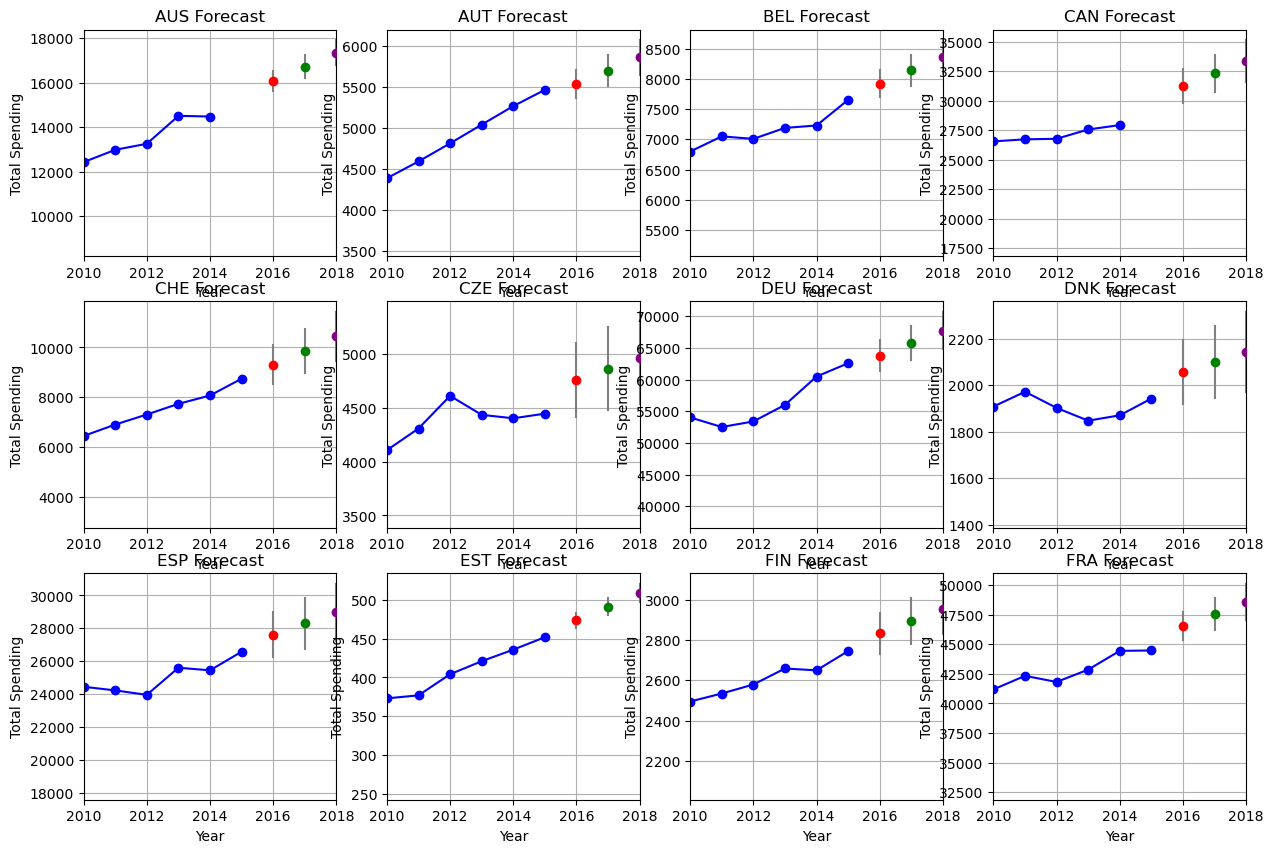

In [33]:


# Forecast TOTAL_SPEND for 2016, 2017, and 2018 for each country
predictions = []

# Initialize a Linear Regression model
model = LinearRegression()

# Iterate through each country in the filtered dataset
for country in df_selected_countries['LOCATION'].unique():
    # Filter data for each country
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Features (X) are the years (TIME), target (y) is the TOTAL_SPEND
    X = country_data[['TIME']]  # Independent variable (time)
    y = country_data['TOTAL_SPEND']  # Dependent variable (total spend)
    
    # Train the linear regression model
    model.fit(X, y)
    
    # Predict for 2016, 2017, and 2018
    prediction_2016 = model.predict(np.array([[2016]]))
    prediction_2017 = model.predict(np.array([[2017]]))
    prediction_2018 = model.predict(np.array([[2018]]))
    
    # Calculate the 90% confidence interval using statsmodels OLS
    X_with_const = sm.add_constant(X)  # Add a constant for intercept
    model_sm = sm.OLS(y, X_with_const).fit()  # Fit the OLS model for confidence interval
    
    # Confidence intervals for 2016, 2017, and 2018
    pred_ci_2016 = model_sm.get_prediction(np.array([[1, 2016]]))
    pred_ci_2017 = model_sm.get_prediction(np.array([[1, 2017]]))
    pred_ci_2018 = model_sm.get_prediction(np.array([[1, 2018]]))
    
    lower_ci_2016 = pred_ci_2016.conf_int()[0][0]
    upper_ci_2016 = pred_ci_2016.conf_int()[0][1]
    lower_ci_2017 = pred_ci_2017.conf_int()[0][0]
    upper_ci_2017 = pred_ci_2017.conf_int()[0][1]
    lower_ci_2018 = pred_ci_2018.conf_int()[0][0]
    upper_ci_2018 = pred_ci_2018.conf_int()[0][1]
    
    # Store the results along with confidence intervals for 2016, 2017, and 2018
    predictions.append({
        'LOCATION': country,
        'TIME': 2016,
        'Predicted_TOTAL_SPEND': prediction_2016[0],
        'Lower_CI_2016': lower_ci_2016,
        'Upper_CI_2016': upper_ci_2016,
        'TIME_2017': 2017,
        'Predicted_TOTAL_SPEND_2017': prediction_2017[0],
        'Lower_CI_2017': lower_ci_2017,
        'Upper_CI_2017': upper_ci_2017,
        'TIME_2018': 2018,
        'Predicted_TOTAL_SPEND_2018': prediction_2018[0],
        'Lower_CI_2018': lower_ci_2018,
        'Upper_CI_2018': upper_ci_2018
    })

# Create a DataFrame to store the results
forecast_df_2016_2018 = pd.DataFrame(predictions)

# Display the forecast results for 2016, 2017, and 2018
print(forecast_df_2016_2018)

# Step 2: Visualize the forecasts with confidence intervals (2016, 2017, and 2018)

# Create a figure for the overall plots
plt.figure(figsize=(15, 10))

# Iterate through each country for plotting
for i, country in enumerate(forecast_df_2016_2018['LOCATION']):
    country_data = df_selected_countries[df_selected_countries['LOCATION'] == country]
    
    # Create a new subplot for each country
    plt.subplot(3, 4, i + 1)  # Create a grid of 3x4 subplots (adjust based on number of countries)
    
    # Plot the actual data points for the country
    plt.plot(country_data['TIME'], country_data['TOTAL_SPEND'], label=f"{country} (Actual)", marker='o', color='blue')
    
    # Get the forecasted values and confidence intervals for 2016, 2017, and 2018
    forecast_row = forecast_df_2016_2018[forecast_df_2016_2018['LOCATION'] == country]
    predicted_value_2016 = forecast_row['Predicted_TOTAL_SPEND'].values[0]
    predicted_value_2017 = forecast_row['Predicted_TOTAL_SPEND_2017'].values[0]
    predicted_value_2018 = forecast_row['Predicted_TOTAL_SPEND_2018'].values[0]
    
    lower_ci_2016 = forecast_row['Lower_CI_2016'].values[0]
    upper_ci_2016 = forecast_row['Upper_CI_2016'].values[0]
    lower_ci_2017 = forecast_row['Lower_CI_2017'].values[0]
    upper_ci_2017 = forecast_row['Upper_CI_2017'].values[0]
    lower_ci_2018 = forecast_row['Lower_CI_2018'].values[0]
    upper_ci_2018 = forecast_row['Upper_CI_2018'].values[0]
    
    # Plot the forecast for 2016, 2017, and 2018 with confidence bands
    plt.plot([2016, 2016], [lower_ci_2016, upper_ci_2016], linestyle='-', color='gray', label='90% CI (2016)')
    plt.plot([2017, 2017], [lower_ci_2017, upper_ci_2017], linestyle='-', color='gray', label='90% CI (2017)')
    plt.plot([2018, 2018], [lower_ci_2018, upper_ci_2018], linestyle='-', color='gray', label='90% CI (2018)')
    
    # Plot the forecast points (2016, 2017, and 2018) as red and green markers
    plt.scatter([2016], [predicted_value_2016], color='red', zorder=5, label='Predicted 2016')
    plt.scatter([2017], [predicted_value_2017], color='green', zorder=5, label='Predicted 2017')
    plt.scatter([2018], [predicted_value_2018], color='purple', zorder=5, label='Predicted 2018')
    
    # Customize the plot
    plt.title(f'{country} Forecast')
    plt.xlabel('Year')
    plt.ylabel('Total Spending')
    plt.xlim(2010, 2018)  # Set x-axis from 2010 to 2018
    #plt.legend(loc='upper left')
    plt.grid(True)

# Adjust the layout to prevent overlapping plots
plt.tight_layout()

# Show the plots
plt.show()


All of these forecasts are well within the 90% confidence interval 